<a href="https://colab.research.google.com/github/angiegh2002/language_app/blob/main/arabic_reverse_dict_t5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install transformers datasets accelerate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.5 MB/s eta 0:00:00


In [12]:
!curl -X GET  "https://huggingface.co/api/datasets/riotu-lab/arabic_reverse_dictionary/parquet/default/train"

["https://huggingface.co/api/datasets/riotu-lab/arabic_reverse_dictionary/parquet/default/train/0.parquet"]

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_parquet("/content/data.parquet")


In [21]:
dataset.head()

,word,definition
0,تمنيع ذاتي,تحريض لاستجابة مناعية لبعض مكونات العضوية [الك...
1,مَسارٌ هاملتوني,مسار يمر عبر كل رأس في رسم بياني دون تكرار أي ...
2,الكلمة,أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...
3,طرف,الجانبي جمع (طرفَة) وهو الغريبة من التمر [لغة]
4,الاسم,كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...


In [22]:
dataset.shape

(58607, 2)

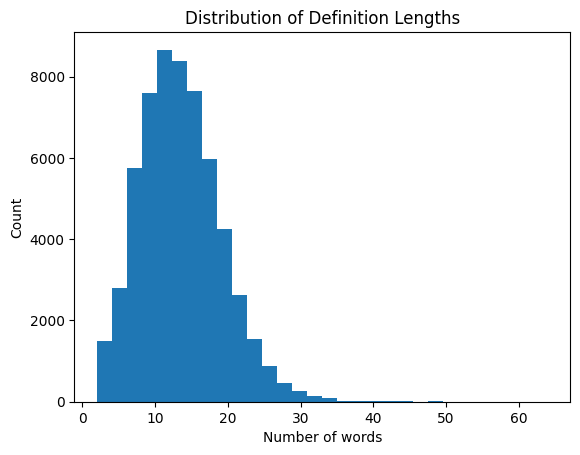

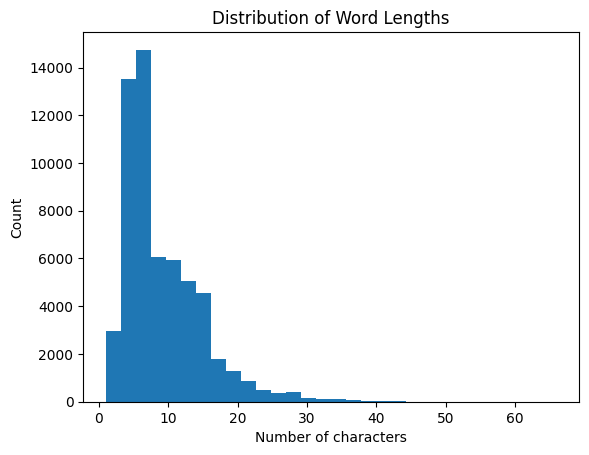

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
def_lengths = [len(str(row['definition']).split()) for index, row in dataset.iterrows() if row['definition'] is not None]
word_lengths = [len(str(row['word'])) for index, row in dataset.iterrows() if row['word'] is not None]

plt.hist(def_lengths, bins=30)
plt.title("Distribution of Definition Lengths")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()

plt.hist(word_lengths, bins=30)
plt.title("Distribution of Word Lengths")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()

In [28]:
definitions = [row['definition'] for index, row in dataset.iterrows()]
words = [row['word'] for index, row in dataset.iterrows()]

print(f"Missing definitions: {sum([d is None for d in definitions])}")
print(f"Missing words: {sum([w is None for w in words])}")

print(f"Unique words: {len(set(words))}")

Missing definitions: 0
Missing words: 2
Unique words: 35617


In [29]:
dataset_clean = dataset.dropna(subset=['word'])
print(f"بعد التنظيف: {len(dataset_clean)} صف")


بعد التنظيف: 58605 صف


In [30]:
dataset_clean.duplicated().sum()

np.int64(61)

In [31]:
dataset_clean = dataset_clean.drop_duplicates()
print(f"بعد التنظيف: {len(dataset_clean)} صف")

بعد التنظيف: 58544 صف


In [33]:
def preprocess(row):
    return pd.Series({
        "input_text": f"reverse: {row['word']}",
        "target_text": row['definition']
    })

processed_df = dataset_clean.apply(preprocess, axis=1)


In [34]:
processed_df

,input_text,target_text
0,reverse: تمنيع ذاتي,تحريض لاستجابة مناعية لبعض مكونات العضوية [الك...
1,reverse: مَسارٌ هاملتوني,مسار يمر عبر كل رأس في رسم بياني دون تكرار أي ...
2,reverse: الكلمة,أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...
3,reverse: طرف,الجانبي جمع (طرفَة) وهو الغريبة من التمر [لغة]
4,reverse: الاسم,كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...
...,...,...
58602,reverse: الاستفهام,طلب معرفة شيء أو تأكيده [لغة]
58603,reverse: السَّعْي إِذا كَانَ,التعبير عن المضي الجري والسعي نحو شيء ما [لغة،...
58604,reverse: الحاجات,المتطلبات الأساسية أو الضرورية للإنسان [اجتماع...
58605,reverse: مُبَرّد بيني,مبادل حراري لتبريد الهواء بين مراحل الضغط المت...


In [ ]:
definitions = [x['definition'] for x in dataset['train']]
words = [x['word'] for x in dataset['train']]

print("عدد الأمثلة:", len(definitions))
print("أول مثال:", dataset['train'][0])

def_lengths = [len(defn.split()) for defn in definitions]
plt.hist(def_lengths, bins=30)
plt.title("توزيع طول التعاريف")
plt.xlabel("عدد الكلمات")
plt.ylabel("عدد الأمثلة")
plt.show()

In [ ]:
def preprocess(example):
    return {
        "input_text": f"reverse: {example['word']}",
        "target_text": example['definition']
    }

processed_dataset = dataset.map(preprocess)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("cahya/t5-small-arabic")

split_dataset = processed_dataset["train"].train_test_split(test_size=0.1)
train_dataset = split_dataset["train"]
eval_dataset = split_dataset["test"]

def tokenize(batch):
    input_encodings = tokenizer(batch['input_text'], truncation=True, padding="max_length", max_length=64)
    target_encodings = tokenizer(batch['target_text'], truncation=True, padding="max_length", max_length=64)
    input_encodings["labels"] = target_encodings["input_ids"]
    return input_encodings

tokenized_train = train_dataset.map(tokenize, batched=True)
tokenized_eval = eval_dataset.map(tokenize, batched=True)

In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained("cahya/t5-small-arabic")

training_args = Seq2SeqTrainingArguments(
    output_dir="./t5_arabic_reverse",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    predict_with_generate=True,
    logging_dir='./logs',
    logging_steps=100,
)

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
)

trainer.train()

In [ ]:
def predict_definition(word):
    input_text = f"reverse: {word}"
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids
    output_ids = model.generate(input_ids, max_length=64)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(predict_definition("قلم"))
print(predict_definition("كتاب"))
print(predict_definition("حاسوب"))

In [ ]:
model.save_pretrained("reverse_dict_t5_arabic")
tokenizer.save_pretrained("reverse_dict_t5_arabic")